In [1]:
%run functions.py

import numpy as np
import pandas as pd
from scipy.io import loadmat

from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor

# Task 2 - Regression 

## Load settings

In [2]:
pd.set_option('display.max_colwidth',-1)
import sys
np.set_printoptions(threshold=sys.maxsize)

k=10 # Define k for crossvalidation
seed = 42 # Seed to use
feature_tot = 0 # Total selected features -> Start at 0 before PCA

scoring='neg_mean_squared_error' # Scoring method for GridsearchCV
score_function = f_regression # Score function for Feature selection


np.random.seed(seed) # Define the random seed

In [3]:
# GridSearchCV
estimators = [
    ('clf', 'passthrough'),
]
param_grid = [
    {
        'clf':[SVR()],
        'clf__C':[0.1,10,100],
    },{
        'clf':[Lasso(random_state=seed)],
        'clf__alpha':[0.1,1.0,2.0,5.0],

    },{
        'clf':[ElasticNet(random_state=seed)],
        'clf__alpha':[0.1,1.0,2.0,5.0],
        'clf__max_iter':[100,5000,10000],
    },{
        'clf':[MLPRegressor()],
        'clf__hidden_layer_sizes':[(100,),(50,50,50)],
        'clf__activation':['relu'],
        'clf__solver':['adam'],
        'clf__alpha':[0.0001,0.001,0.1],
        'clf__max_iter':[200,100,50,2000],
        'clf__early_stopping':[True, False]
    }
]

## Load dataset

In [4]:
filename = "datasets/ChemTrainNew.mat"

mat = loadmat(filename)
input_train = mat['XtrainDS']

target_train = mat['YtrainDS'].reshape(len(input_train))
input_test = mat['XtestDS']


input_train = input_train[:,1:]
input_test = input_test[:,1:]

## Data info

In [5]:
get_data_info(input_train, target_train)

Length of 4466
X.shape: (4466, 64) y.shape: (4466,)
Contains Nan: False False
Contains +inf: False False
Contains -inf: False False
Input: [[1.128450e+03 7.962500e+01 3.917250e+02 4.602500e+01 1.418250e+03
  1.170000e+03 4.014000e+02 3.272500e+01 1.477500e+03 1.192000e+03
  7.017500e+01 3.979125e+02 7.755000e+01 1.838125e+04 8.760000e+01
  4.002750e+02 8.368750e+00 8.000000e-02 1.806250e+02 2.045625e+02
  3.118000e+01 3.034000e+01 3.517500e+00 1.350000e+01 8.722500e+01
  5.042500e+01 5.317500e+01 5.050000e+01 8.922500e+01 5.040000e+01
  8.840000e+01 4.072500e+01 7.835000e+01 2.975000e+01 2.430000e+01
  7.417500e+01 4.992500e+01 2.000000e-01 2.875000e+00 4.227500e+01
  6.019582e+01 2.840000e+02 1.958000e+00 4.310000e+01 6.400000e+01
  1.389750e+00 4.935000e+01 5.197500e+01 5.251750e+01 5.026000e+01
  5.239500e+01 5.316500e+01 4.821250e+01 7.001250e+01 2.106250e+01
  5.552750e+01 3.291750e+01 5.222500e+01 2.842000e+01 5.113500e+01
  4.873750e+01 5.071500e+01 4.847500e+01 2.983750e+01]
 [

## Preprocess
Normalize the dataset

In [6]:
input_train, input_test, target_train, input_train_copy, input_train_copy_normalized = preprocessing(input_train,target_train, input_test)

4466


## Feature reduction
Reduce dimensionality by PCA transform

In [7]:
feature_tot, pca, pca_input = feature_reduction(input_train, target_train,input_train_copy)

original shape:    (4466, 64)
transformed shape: (4466, 27)
Explained variance: [0.35441177 0.10266607 0.08168297 0.06419575 0.04078661 0.03237526
 0.02810572 0.02543366 0.02006375 0.01845131 0.01694614 0.01636917
 0.01491138 0.01382942 0.01316199 0.01296958 0.01199725 0.01115177
 0.01076023 0.00977379 0.00960008 0.00898462 0.00881979 0.00757174
 0.00678392 0.0063734  0.00541192]


# Plot PCA

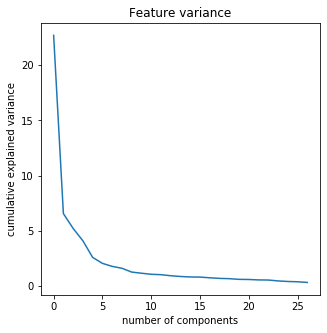

In [8]:
plot_feature_variance(pca_input)

## Plot top 10 histogram over reduced features

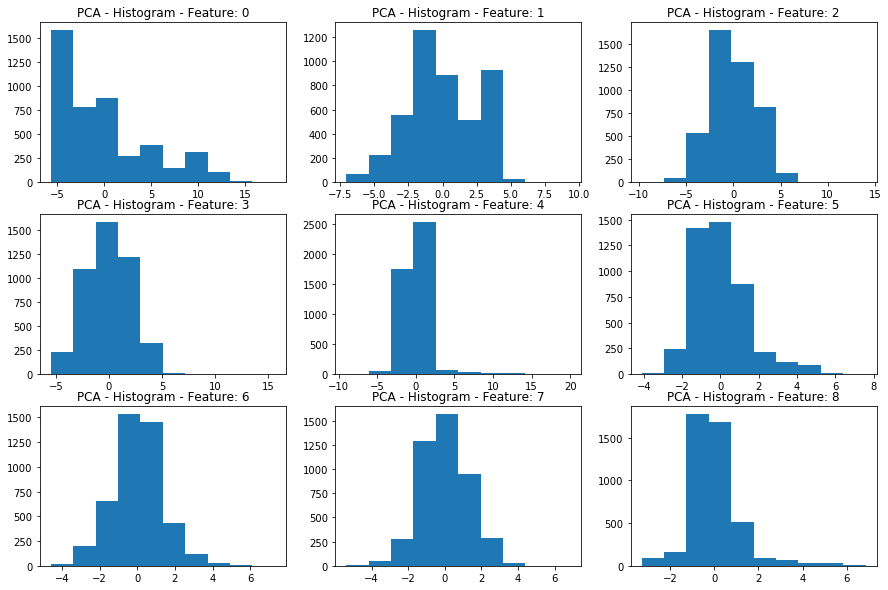

In [9]:
plot_top_features(feature_tot,pca_input)

# Feature selection
Extract top features above depending on PCA

(4466, 64)


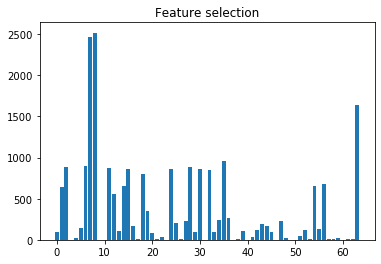

In [10]:
input_train_fs, input_test_fs = feature_selection(score_function, input_train, target_train, input_test, feature_tot=feature_tot)

## Hyperparameter tuning

In [ ]:
# GridSearchCV
grid = parameter_tuning(estimators, param_grid, input_train_fs, target_train, scoring=scoring, k=k)


Fitting 10 folds for each of 67 candidates, totalling 670 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min


## Get Model info

In [ ]:
get_model_info(grid)

In [ ]:
validate_curve(grid, input_train_fs, target_train,scoring=scoring, k=k)

# Predict testset

In [ ]:
model = predict_model(grid, input_train_fs, target_train, input_test_fs)